In [1]:
import json
import numpy as np
import pandas as pd

# Path to the JSON file with new parameters
json_path = 'Samoa_scenario1.json'

# Read the JSON file
with open(json_path, 'r') as file:
    parameters = json.load(file)

# Display the loaded parameters to confirm
parameters

{'Tmax': 60,
 'D': 16,
 'L': 1,
 'ls': 1,
 'le': 60,
 'α': 0.6,
 'β': 0.2,
 'γ': 0.3,
 'reduction_factor': 0.0,
 'Connectivity Matrix W': {'Outside World - AP, Aana Alofi - AP': 604,
  'Outside World - FP, Faasaleleaga - FP': 280,
  'Faasaleleaga - LR, Gagaemauga - LR': 827,
  'Gagaemauga - LR, Gagaifoumauga - LR': 413,
  'Gagaifoumauga - LR, Vaisigano - LR': 752,
  'Vaisigano - LR, Falealupo - LR': 221,
  'Falealupo - LR, Alataua i Sisifo - LR': 221,
  'Alataua i Sisifo - LR, Salega - LR': 378,
  'Salega - LR, Palauli & Satupaitea - LR': 717,
  'Palauli & Satupaitea - LR, Faasaleleaga - LR': 1668,
  'Faasaleleaga - LR, Aiga i le Tai - LR': 1176,
  'Aiga i le Tai - LR, Falelatai & Samatau - LR': 651,
  'Falelatai & Samatau - LR, Lefaga & Faleaseela - LR': 651,
  'Lefaga & Faleaseela - LR, Safata - LR': 898,
  'Safata - LR, Siumu - LR': 510,
  'Siumu - LR, Falealili - LR': 510,
  'Falealili - LR, Lotofaga - LR': 387,
  'Lotofaga - LR, Lepa - LR': 290,
  'Lepa - LR, Aleipata Itupa i Luga

In [2]:
# Parameters
Tmax = parameters['Tmax'] #time frame
D = parameters['D']  # Number of locations
L = parameters['L']  # Number of locations connected to the outside world
reduction_factor = parameters['reduction_factor'] #percentage of people who will be connected is there is a lockdown
Tmax, D, L, reduction_factor

(60, 16, 1, 0.0)

In [3]:
def extract_locations(parameters):
    # This function extracts all unique locations from the keys of the connectivity matrix in the order they appear
    locations_ordered = []
    seen_locations = set()
    for key in parameters['Connectivity Matrix W'].keys():
        # Split the key on the comma
        places = key.split(',')
        for place in places:
            place_cleaned = place.strip()
            if place_cleaned not in seen_locations:
                seen_locations.add(place_cleaned)
                locations_ordered.append(place_cleaned)
    return locations_ordered

def create_index_mapping(locations):
    # This function creates a dictionary that maps location names to indices
    return {location: index for index, location in enumerate(locations)}



def create_connectivity_matrix(parameters, location_to_index):
    D = len(location_to_index)  # The number of locations
    W = np.zeros((D, D), dtype=int)  # Initialize the connectivity matrix with zeros
    matrix_binary = pd.DataFrame(W.copy(), index=location_to_index.keys(), columns=location_to_index.keys())
    matrix_volume = pd.DataFrame(W.copy(), index=location_to_index.keys(), columns=location_to_index.keys())

    # Populate the connectivity matrix using the index mapping
    for key, value in parameters['Connectivity Matrix W'].items():
        places = key.split(',')
        i = location_to_index[places[0].strip()]
        j = location_to_index[places[1].strip()]
        matrix_binary.iloc[i, j] = 1
        matrix_volume.iloc[i, j] = value

    # Make the matrix symmetrical
    matrix_binary = matrix_binary + matrix_binary.T
    matrix_volume = matrix_volume + matrix_volume.T

    # Ensure the diagonal is zero
    np.fill_diagonal(matrix_binary.values, 0)
    np.fill_diagonal(matrix_volume.values, 0)
    return matrix_binary, matrix_volume


# Extract locations in the order they appear in the JSON file
locations_ordered = extract_locations(parameters)

# Create a mapping from location names to indices
location_to_index = create_index_mapping(locations_ordered)

# Create the connectivity matrix
W_binary, W_volume = create_connectivity_matrix(parameters, location_to_index)

# Create a DataFrame from the connectivity matrix with the ordered locations
W_df_binary = pd.DataFrame(W_binary, index=locations_ordered, columns=locations_ordered)
W_df = pd.DataFrame(W_volume, index=locations_ordered, columns=locations_ordered)

W_df_binary


,Outside World - AP,Aana Alofi - AP,Outside World - FP,Faasaleleaga - FP,Faasaleleaga - LR,Gagaemauga - LR,Gagaifoumauga - LR,Vaisigano - LR,Falealupo - LR,Alataua i Sisifo - LR,...,Lepa - LR,Aleipata Itupa i Luga - LR,Aleipata Itupa i Lalo - LR,Vaa o Fonoti - LR,Anoamaa - LR,Vaimauga - LR,Faleata - LR,Sagaga - LR,Aana Alofi - LR,Aiga i le Tai - FP
Outside World - AP,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aana Alofi - AP,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Outside World - FP,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Faasaleleaga - FP,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Faasaleleaga - LR,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gagaemauga - LR,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gagaifoumauga - LR,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Vaisigano - LR,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Falealupo - LR,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Alataua i Sisifo - LR,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
W_df

,Outside World - AP,Aana Alofi - AP,Outside World - FP,Faasaleleaga - FP,Faasaleleaga - LR,Gagaemauga - LR,Gagaifoumauga - LR,Vaisigano - LR,Falealupo - LR,Alataua i Sisifo - LR,...,Lepa - LR,Aleipata Itupa i Luga - LR,Aleipata Itupa i Lalo - LR,Vaa o Fonoti - LR,Anoamaa - LR,Vaimauga - LR,Faleata - LR,Sagaga - LR,Aana Alofi - LR,Aiga i le Tai - FP
Outside World - AP,0,604,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aana Alofi - AP,604,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Outside World - FP,0,0,0,280,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Faasaleleaga - FP,0,0,280,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50
Faasaleleaga - LR,0,0,0,0,0,827,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gagaemauga - LR,0,0,0,0,827,0,413,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gagaifoumauga - LR,0,0,0,0,0,413,0,752,0,0,...,0,0,0,0,0,0,0,0,0,0
Vaisigano - LR,0,0,0,0,0,0,752,0,221,0,...,0,0,0,0,0,0,0,0,0,0
Falealupo - LR,0,0,0,0,0,0,0,221,0,221,...,0,0,0,0,0,0,0,0,0,0
Alataua i Sisifo - LR,0,0,0,0,0,0,0,0,221,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Initialize n_per_community with the values of 'n' from the JSON file
n_per_community = parameters['n']

In [6]:
# Print all values of 'n' for each population
for community, n_value in n_per_community.items():
    print(f'{community}: {n_value}')

Faasaleleaga: 15290
Gagaemauga: 4136
Gagaifoumauga: 4797
Vaisigano: 3760
Falealupo: 1106
Alataua i Sisifo: 1891
Salega: 3584
Palauli & Satupaitea: 8338
Vaimauga: 31531
Faleata: 36942
Sagaga: 26869
Aana Alofi: 15939
Aiga i le Tai: 5880
Falelatai & Samatau: 3256
Lefaga & Faleaseela: 4488
Safata: 7320
Siumu: 2551
Falealili: 4958
Lotofaga: 1935
Lepa: 1460
Aleipata Itupa i Luga: 1338
Aleipata Itupa i Lalo: 4426
Vaa o Fonoti: 1404
Anoamaa: 10085
Outside World: 8100000000


In [7]:
# Reverse mapping of ports to communities to facilitate grouping by community in the connectivity matrix.
port_to_community = {}
for community, ports in parameters['ports_according_communities'].items():
    for port in ports:
        port_to_community[port] = community

# Initialize the community connectivity matrix
community_names = list(parameters['ports_according_communities'].keys())
community_index = {name: i for i, name in enumerate(community_names)}
community_connectivity = np.zeros((len(community_names), len(community_names)), dtype=int)

# Fill the matrix based on the connections between ports, grouping by communities.
for (port_from_to, passengers) in parameters['Connectivity Matrix W'].items():
    port_from, port_to = port_from_to.split(',')
    community_from = port_to_community[port_from.strip()]
    community_to = port_to_community[port_to.strip()]
    i = community_index[community_from]
    j = community_index[community_to]
    community_connectivity[i, j] += passengers
    community_connectivity[j, i] += passengers  # Assuming bidirectional connection

# Convert community connectivity matrix to DataFrame for better visualization.
community_connectivity_df = pd.DataFrame(community_connectivity, index=community_names, columns=community_names)

community_connectivity_df

,Outside World,Aana Alofi,Faasaleleaga,Gagaemauga,Gagaifoumauga,Vaisigano,Falealupo,Alataua i Sisifo,Salega,Palauli & Satupaitea,...,Lefaga & Faleaseela,Safata,Siumu,Falealili,Lotofaga,Lepa,Aleipata Itupa i Luga,Aleipata Itupa i Lalo,Vaa o Fonoti,Anoamaa
Outside World,0,604,280,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aana Alofi,604,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Faasaleleaga,280,0,0,827,0,0,0,0,0,1668,...,0,0,0,0,0,0,0,0,0,0
Gagaemauga,0,0,827,0,413,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gagaifoumauga,0,0,0,413,0,752,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vaisigano,0,0,0,0,752,0,221,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Falealupo,0,0,0,0,0,221,0,221,0,0,...,0,0,0,0,0,0,0,0,0,0
Alataua i Sisifo,0,0,0,0,0,0,221,0,378,0,...,0,0,0,0,0,0,0,0,0,0
Salega,0,0,0,0,0,0,0,378,0,717,...,0,0,0,0,0,0,0,0,0,0
Palauli & Satupaitea,0,0,1668,0,0,0,0,0,717,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
def initialize_state_vectors(parameters):
    # Retrieve community data and standard percentages
    n_per_community = parameters['n'].copy()
    communities_ordered = list(n_per_community.keys())
    percentages_standard = np.array(parameters['percentages_standard'])
    percentages_outside_world = np.array(parameters['percentages_outside_world'])

    # Initialize the state vectors
    x = np.zeros((len(communities_ordered), 4), dtype=int)  # Use integer for state vectors
    
    # Set up state vectors for each community
    for i, community in enumerate(communities_ordered):
        n = n_per_community[community]  # Population of the community
        if community == "Outside World":
            # Use specific percentages for the "Outside World"
            x[i] = np.round(percentages_outside_world * n).astype(int)
        else:
            # Use standard percentages for domestic communities
            x[i] = np.round(percentages_standard * n).astype(int)

    # Convert the state vectors to a DataFrame for better visualization
    state_vectors_df = pd.DataFrame(x, columns=['Susceptible', 'Exposed', 'Infected', 'Recovered'],
                                    index=communities_ordered)

    return state_vectors_df, communities_ordered

In [9]:
state_vectors_df, communities_ordered = initialize_state_vectors(parameters)
x = state_vectors_df.values 

In [10]:
state_vectors_df

,Susceptible,Exposed,Infected,Recovered
Faasaleleaga,12232,764,764,1529
Gagaemauga,3309,207,207,414
Gagaifoumauga,3838,240,240,480
Vaisigano,3008,188,188,376
Falealupo,885,55,55,111
Alataua i Sisifo,1513,95,95,189
Salega,2867,179,179,358
Palauli & Satupaitea,6670,417,417,834
Vaimauga,25225,1577,1577,3153
Faleata,29554,1847,1847,3694


In [11]:
def update_community_connectivity_df(W_df, ports_according_communities, port_to_community):
    community_names = list(ports_according_communities.keys())
    community_connectivity = np.zeros((len(community_names), len(community_names)), dtype=int)
    
    community_index = {name: i for i, name in enumerate(community_names)}
    
    for port_from in W_df.index:
        for port_to in W_df.columns:
            if W_df.loc[port_from, port_to] > 0:
                community_from = port_to_community.get(port_from, "")
                community_to = port_to_community.get(port_to, "")
                if community_from and community_to:
                    i = community_index[community_from]
                    j = community_index[community_to]
                    community_connectivity[i, j] += W_df.loc[port_from, port_to]
    
    return pd.DataFrame(community_connectivity, index=community_names, columns=community_names)

def apply_lockdown_and_update(lockdown_ports, reduction_factor):
    global W_df, community_connectivity_df
    W_df = original_W_df.copy()  # Restore W_df to its original state before lockdown
    
    for port in lockdown_ports:
        connected_ports = W_df[port].index.tolist()
        W_df.loc[port, connected_ports] *= reduction_factor
        W_df.loc[connected_ports, port] *= reduction_factor
    
    community_connectivity_df = update_community_connectivity_df(W_df, parameters['ports_according_communities'], port_to_community)

In [12]:
# Applying changes
original_W_df = W_df.copy()
lockdown_ports = parameters['lockdown_ports']
apply_lockdown_and_update(lockdown_ports, reduction_factor)

community_connectivity_df = update_community_connectivity_df(W_df, parameters['ports_according_communities'], port_to_community)

In [13]:
community_connectivity_df

,Outside World,Aana Alofi,Faasaleleaga,Gagaemauga,Gagaifoumauga,Vaisigano,Falealupo,Alataua i Sisifo,Salega,Palauli & Satupaitea,...,Lefaga & Faleaseela,Safata,Siumu,Falealili,Lotofaga,Lepa,Aleipata Itupa i Luga,Aleipata Itupa i Lalo,Vaa o Fonoti,Anoamaa
Outside World,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aana Alofi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Faasaleleaga,0,0,0,827,0,0,0,0,0,1668,...,0,0,0,0,0,0,0,0,0,0
Gagaemauga,0,0,827,0,413,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gagaifoumauga,0,0,0,413,0,752,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vaisigano,0,0,0,0,752,0,221,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Falealupo,0,0,0,0,0,221,0,221,0,0,...,0,0,0,0,0,0,0,0,0,0
Alataua i Sisifo,0,0,0,0,0,0,221,0,378,0,...,0,0,0,0,0,0,0,0,0,0
Salega,0,0,0,0,0,0,0,378,0,717,...,0,0,0,0,0,0,0,0,0,0
Palauli & Satupaitea,0,0,1668,0,0,0,0,0,717,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
def balanced_migration_step(W_df, x, communities_ordered, port_to_community, n):
    D = len(communities_ordered)
    Delta_out = np.zeros_like(x)  # Matrix of output changes
    Delta_in = np.zeros_like(x)   # Matrix of input changes

    for port_from in W_df.index:
        for port_to in W_df.columns:
            if W_df.loc[port_from, port_to] > 0:  # Checks for possible migration between ports
                community_from = port_to_community.get(port_from, "")
                community_to = port_to_community.get(port_to, "")
                if community_from and community_to:
                    i = communities_ordered.index(community_from)
                    j = communities_ordered.index(community_to)

                    migration_value = W_df.loc[port_from, port_to]

                    for cat in np.random.permutation(4):  # Itera in random order for each state
                        available_to_move = min(x[i, cat] - Delta_out[i, cat], migration_value)
                        available_capacity = n[community_to] - np.sum(x[j]) - np.sum(Delta_in[j])

                        moving_pop = min(available_to_move, available_capacity)
                        Delta_out[i, cat] += moving_pop
                        Delta_in[j, cat] += moving_pop

                        migration_value -= moving_pop
                        if migration_value <= 0:
                            break

    # Apply migration changes
    x_new = x - Delta_out + Delta_in

    # Ensure that no state exceeds the initial population
    x_new = np.clip(x_new, 0, None)
    total_population_check = np.sum(x_new, axis=1)
    for i in range(D):
        if total_population_check[i] > n[communities_ordered[i]]:
            excess_population = total_population_check[i] - n[communities_ordered[i]]
            x_new[i, np.argmax(x_new[i])] -= excess_population

    return x_new

In [15]:
# Run the migration step
x_new = balanced_migration_step(W_df, x, communities_ordered, port_to_community, n_per_community)

# Now that x_new is defined, you can create a DataFrame and then print it.
x_new_df = pd.DataFrame(x_new, index=communities_ordered, columns=['Susceptible', 'Exposed', 'Infected', 'Recovered'])

In [16]:
x_new_df

,Susceptible,Exposed,Infected,Recovered
Faasaleleaga,12231,765,764,1530
Gagaemauga,3310,206,207,413
Gagaifoumauga,3837,240,240,480
Vaisigano,3008,188,188,376
Falealupo,884,56,55,111
Alataua i Sisifo,1513,93,95,189
Salega,2867,180,179,358
Palauli & Satupaitea,6670,417,417,834
Vaimauga,25224,1577,1577,3153
Faleata,29554,1847,1847,3693


In [17]:
def infection_step(x_new, lockdown=False):
    # Defines rates of disease transmission, recovery and progression.
    α = parameters['α']  # The transmission rate
    β = parameters['β']  # Recovery rate
    γ = parameters['γ']  # Rate of progression of those exposed to infectious diseases

    # D is the total number of communities.
    D = x_new.shape[0]
    
    # Initializes an array to store the updated states after the infection step.
    x_updated = np.zeros_like(x_new)

    for i in range(D):
        # Calculates the total population of community i.
        n = x_new[i, :].sum()
        
        if n > 0:
            # Extracts the individual states for the community i.
            S, E, I, R = x_new[i, 0], x_new[i, 1], x_new[i, 2], x_new[i, 3]

            # Calculates transitions between states based on current rates and population.
            δ_SE = np.random.binomial(S, α*I/n if n > 0 else 0)  # Susceptibles that become exposed
            δ_EI = np.random.binomial(E, γ)  # Exposed who become infected
            δ_IR = np.random.binomial(I, β)  # Infected recovering

            # Updates the states for community i based on the calculated transitions.
            x_updated[i] = [S - δ_SE, E + δ_SE - δ_EI, I + δ_EI - δ_IR, R + δ_IR]
    
    return x_updated

In [18]:
def run_simulation(parameters, W_df, original_W_df):
    # Initializes state and connectivity vectors
    state_vectors_df, communities_ordered = initialize_state_vectors(parameters)
    x = state_vectors_df.to_numpy()  # Extracts the numpy array for use in the simulation

    # Initializes the history to store the status for each day.
    history = []

    # Reads the initial population total for each community from the JSON
    n = parameters['n']

    # Retrieves specific parameters from the parameter dictionary
    lockdown_start_day = parameters['ls']
    lockdown_duration = parameters['le']
    lockdown_ports = parameters['lockdown_ports']
    lockdown_end_day = lockdown_start_day + lockdown_duration

    # Bucle de simulación
    for day in range(parameters['Tmax']):
        # Apply lockdown
        if day == lockdown_start_day:
            apply_lockdown_and_update(lockdown_ports, parameters['reduction_factor'])
            
        # End lockdown
        if day == lockdown_end_day + 1:
            W_df = original_W_df.copy()

        # Migration step only when not in lockdown
        if not (lockdown_start_day <= day <= lockdown_end_day):
            x = balanced_migration_step(W_df, x, communities_ordered, port_to_community, n)
        
        # Step of infection occurs every day
        x = infection_step(x, parameters)  # Pass parameters to infection_step to use the rates

        # Records the status for day t
        history.append(x.copy())

    return history

In [19]:
# Run the simulation
history = run_simulation(parameters, W_df, original_W_df)

In [20]:
# Convert the history list to a DataFrame
days = [f"Day {i + 1}" for i in range(len(history))]
communities = communities_ordered
index = pd.MultiIndex.from_product([days, communities], names=['Day', 'Community'])
history_reshaped = np.vstack(history)  # Aplanar la lista de arrays en un único array
history_df = pd.DataFrame(history_reshaped, columns=['Susceptible', 'Exposed', 'Infected', 'Recovered'], index=index)

In [21]:
history_df

Susceptible  Exposed  Infected   Recovered
Day    Community                                                        
Day 1  Faasaleleaga                 11872      900       841        1677
       Gagaemauga                    3204      248       236         448
       Gagaifoumauga                 3721      298       254         524
       Vaisigano                     2908      226       215         411
       Falealupo                      848       76        62         120
...                                   ...      ...       ...         ...
Day 60 Aleipata Itupa i Luga           79        0         7        1252
       Aleipata Itupa i Lalo          273        0         7        4145
       Vaa o Fonoti                    84        1         1        1317
       Anoamaa                        629        2         3        9451
       Outside World            319646168   210184   1316767  7778826881

[1500 rows x 4 columns]

In [22]:
# Create a list to store the data
all_data = []

# Exclude “Outside World” communities for the calculations
communities = [comm for comm in communities_ordered]

# Iterate on communities
for community in communities:
    # Extract the data for each community from the DataFrame history_df
    community_data = history_df.xs(community, level='Community')

    # Calculating percentage distributions and rounding to two decimal places
    total_population_by_day = community_data.sum(axis=1).values.reshape(-1, 1)
    percentages = (community_data.values / total_population_by_day) * 100
    percentages = np.round(percentages, 2)  # Redondear a dos decimales

    # Combine total data and percentages
    combined_data = np.hstack((community_data.values, percentages))

    for day, day_data in enumerate(combined_data, start=1):
        all_data.append((community, day, *day_data))

# Columns now include both totals and percentages.
columns_combined = ['Community', 'Day', 'Susceptible', 'Exposed', 'Infected', 'Recovered', 'Susceptible (%)', 'Exposed (%)', 'Infected (%)', 'Recovered (%)']

# Convert the list into a DataFrame
all_communities_df = pd.DataFrame(all_data, columns=columns_combined)

# Set up a multiple index based on 'Community' and 'Day'.
all_communities_df.set_index(['Community', 'Day'], inplace=True)

# Display the combined DataFrame
all_communities_df

Susceptible   Exposed   Infected     Recovered  \
Community     Day                                                   
Faasaleleaga  1        11872.0     900.0      841.0  1.677000e+03   
              2        11476.0    1053.0      914.0  1.847000e+03   
              3        11092.0    1122.0     1042.0  2.034000e+03   
              4        10655.0    1224.0     1179.0  2.232000e+03   
              5        10170.0    1369.0     1300.0  2.451000e+03   
...                        ...       ...        ...           ...   
Outside World 56   319838376.0  407249.0  2547100.0  7.777207e+09   
              57   319777567.0  345946.0  2160482.0  7.777716e+09   
              58   319726210.0  293188.0  1832306.0  7.778148e+09   
              59   319682849.0  248369.0  1553611.0  7.778515e+09   
              60   319646168.0  210184.0  1316767.0  7.778827e+09   

                   Susceptible (%)  Exposed (%)  Infected (%)  Recovered (%)  
Community     Day                                                             
Faasaleleaga  1              77.65         5.89          5.50          10.97  
              2              75.06         6.89          5.98          12.08  
              3              72.54         7.34          6.81          13.30  
              4              69.69         8.01          7.71          14.60  
              5              66.51         8.95          8.50          16.03  
...                            ...          ...           ...            ...  
Outside World 56              3.95         0.01          0.03          96.01  
              57              3.95         0.00          0.03          96.02  
              58              3.95         0.00          0.02          96.03  
              59              3.95         0.00          0.02          96.03  
              60              3.95         0.00          0.02          96.03  

[1500 rows x 8 columns]

In [23]:
# Create a list to store both total numbers and percentages per day for all communities, excluding "Outside World."
country_data = []

# Exclude "Outside World" communities for calculations
filtered_communities = [c for c in communities_ordered if c != "Outside World"]

# Iterate through each day to calculate the totals and percentages
for day in range(1, parameters['Tmax'] + 1):
    # Extract data for the current day and filtered communities
    day_data_df = history_df.xs(f"Day {day}", level='Day').loc[filtered_communities]

    # Sum the states for all selected communities
    day_data = day_data_df.sum(axis=0).astype(int).values

    # Calculate the total population for this day
    total_population = day_data.sum()

    # Calculate percentages and round to two decimal places
    percentages = np.round((day_data / total_population) * 100, 2) if total_population > 0 else np.zeros(4)

    # Add both totals and percentages to the list
    country_data.append(np.concatenate((day_data, percentages)))

# Convert the list into a DataFrame
columns = ['Susceptible', 'Exposed', 'Infected', 'Recovered', 
           'Susceptible (%)', 'Exposed (%)', 'Infected (%)', 'Recovered (%)']
days = np.arange(1, parameters['Tmax'] + 1)
country_data_df = pd.DataFrame(country_data, columns=columns, index=days)
country_data_df.index.name = 'Day'

# Display the resulting DataFrame
country_data_df

,Susceptible,Exposed,Infected,Recovered,Susceptible (%),Exposed (%),Infected (%),Recovered (%)
Day,,,,,,,,
1,157655.0,12073.0,11205.0,22346.0,77.56,5.94,5.51,10.99
2,152431.0,13675.0,12619.0,24554.0,74.99,6.73,6.21,12.08
3,146878.0,15103.0,14303.0,26995.0,72.25,7.43,7.04,13.28
4,140696.0,16732.0,15970.0,29881.0,69.21,8.23,7.86,14.70
5,134159.0,18219.0,17880.0,33021.0,66.00,8.96,8.80,16.24
6,127184.0,19631.0,19931.0,36533.0,62.57,9.66,9.80,17.97
7,119832.0,21078.0,21868.0,40501.0,58.95,10.37,10.76,19.92
8,112133.0,22347.0,23965.0,44834.0,55.16,10.99,11.79,22.06
9,104097.0,23779.0,25785.0,49618.0,51.21,11.70,12.68,24.41


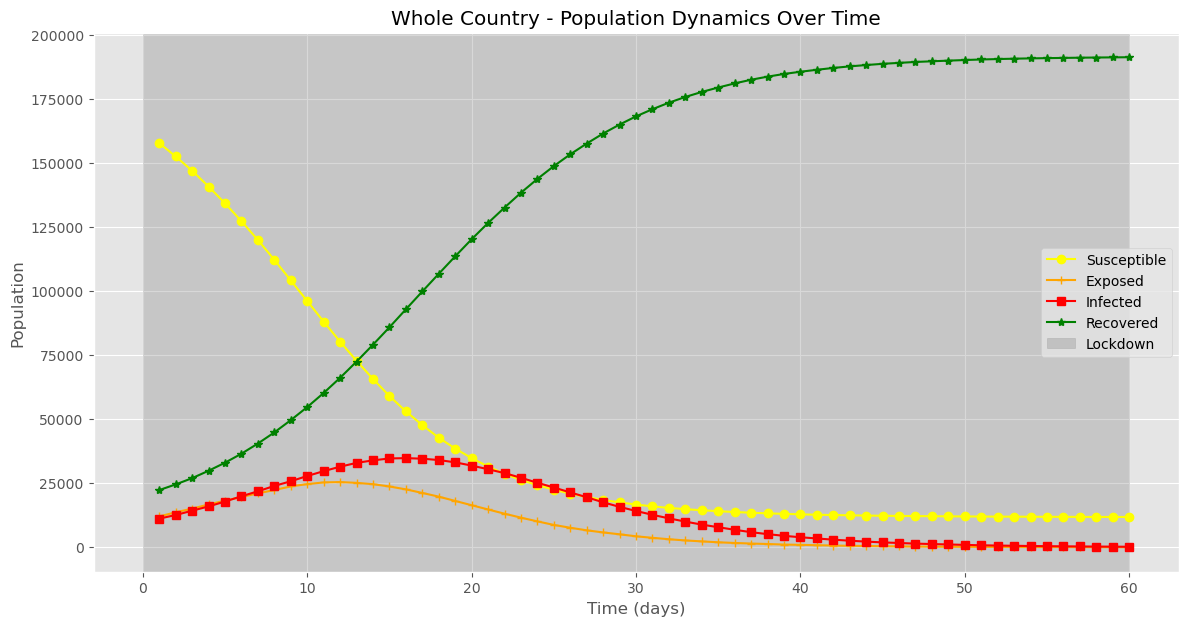

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Configure the style of the graphics
plt.style.use('ggplot')

# Create the figure and axes for the chart
fig, ax = plt.subplots(figsize=(14, 7))

# Draw the lines for the total numbers
ax.plot(country_data_df.index, country_data_df['Susceptible'], label='Susceptible', color='yellow', marker='o')
ax.plot(country_data_df.index, country_data_df['Exposed'], label='Exposed', color='orange', marker='+')
ax.plot(country_data_df.index, country_data_df['Infected'], label='Infected', color='red', marker='s')
ax.plot(country_data_df.index, country_data_df['Recovered'], label='Recovered', color='green', marker='*')

# Add title and tags
ax.set_title('Whole Country - Population Dynamics Over Time')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Population')

# Check if there are affected ports outside “Outside World”.
lockdown_ports = parameters['lockdown_ports']
lockdown_has_non_outside_world_ports = any(
    port not in parameters['ports_according_communities']['Outside World'] for port in lockdown_ports
)

# Highlight the lockdown period if applicable
if lockdown_has_non_outside_world_ports:
    lockdown_start = parameters['ls'] - 1  # Adjust for zero-based indexing
    lockdown_end = parameters['le'] + lockdown_start
    ax.axvspan(lockdown_start, lockdown_end, color='grey', alpha=0.3, label='Lockdown')

# Add the legend
ax.legend()

# Display the graph
plt.show()

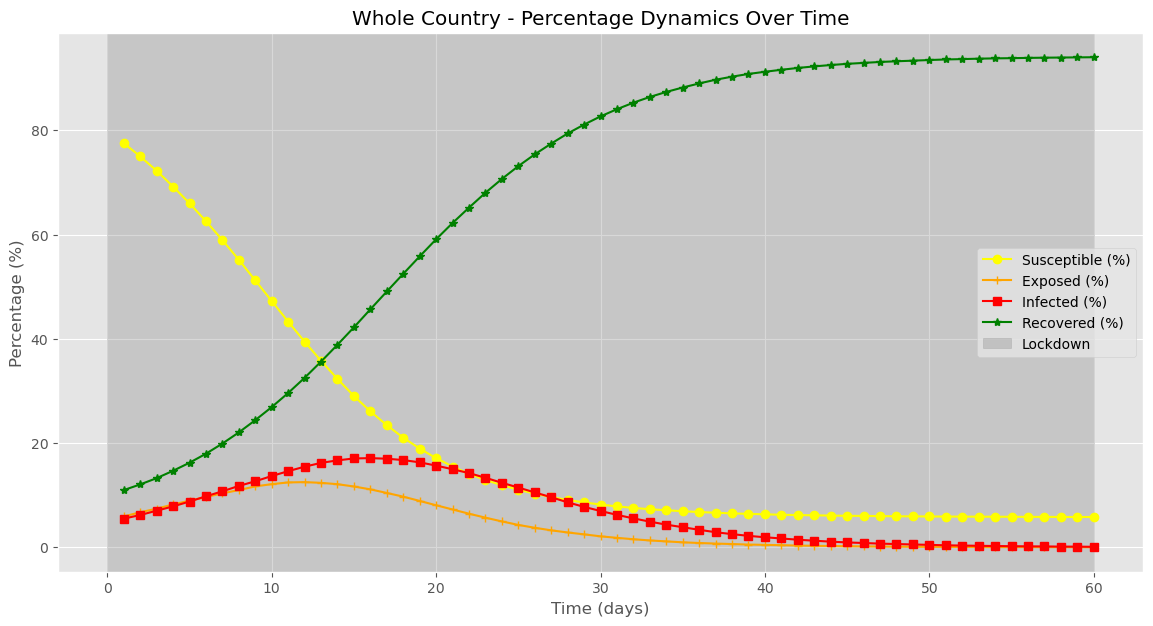

In [25]:
# Create the figure and axes for the chart
fig, ax = plt.subplots(figsize=(14, 7))

# Draw the lines for the percentages
ax.plot(country_data_df.index, country_data_df['Susceptible (%)'], label='Susceptible (%)', color='yellow', marker='o')
ax.plot(country_data_df.index, country_data_df['Exposed (%)'], label='Exposed (%)', color='orange', marker='+')
ax.plot(country_data_df.index, country_data_df['Infected (%)'], label='Infected (%)', color='red', marker='s')
ax.plot(country_data_df.index, country_data_df['Recovered (%)'], label='Recovered (%)', color='green', marker='*')

# Add title and tags
ax.set_title('Whole Country - Percentage Dynamics Over Time')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Percentage (%)')

# Check if there are affected ports outside “Outside World”.
lockdown_ports = parameters['lockdown_ports']
lockdown_has_non_outside_world_ports = any(
    port not in parameters['ports_according_communities']['Outside World'] for port in lockdown_ports
)

# Highlight the lockdown period if applicable
if lockdown_has_non_outside_world_ports:
    lockdown_start = parameters['ls'] - 1  # Adjust for zero-based indexing
    lockdown_end = parameters['le'] + lockdown_start
    ax.axvspan(lockdown_start, lockdown_end, color='grey', alpha=0.3, label='Lockdown')

# Add the legend
ax.legend()

# Display the graph
plt.show()


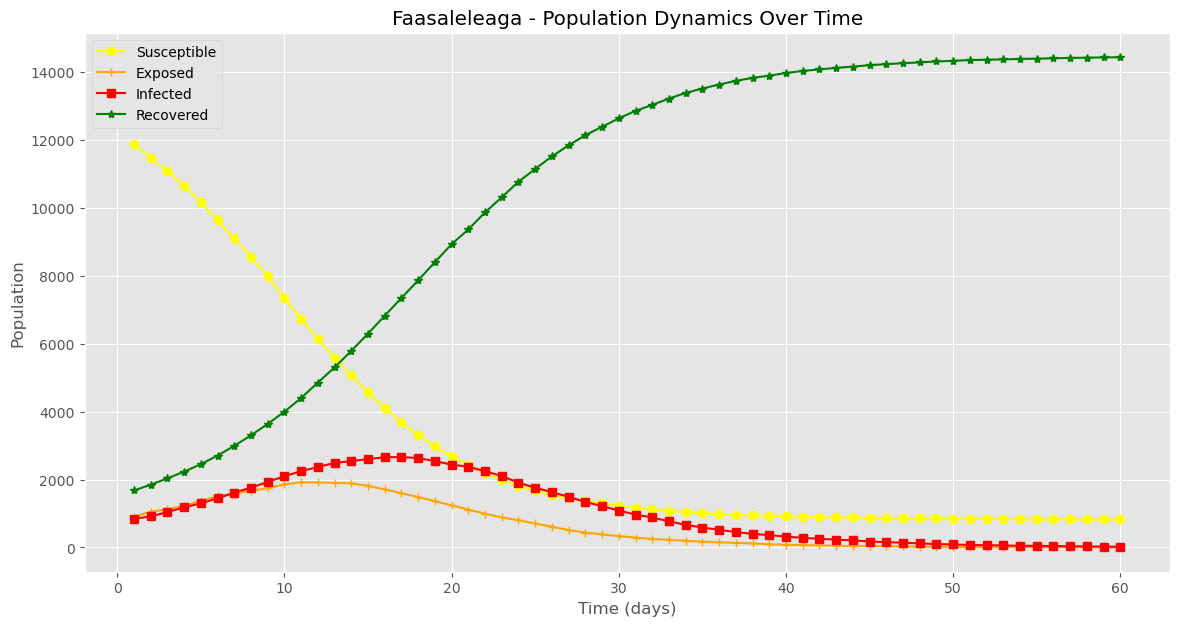

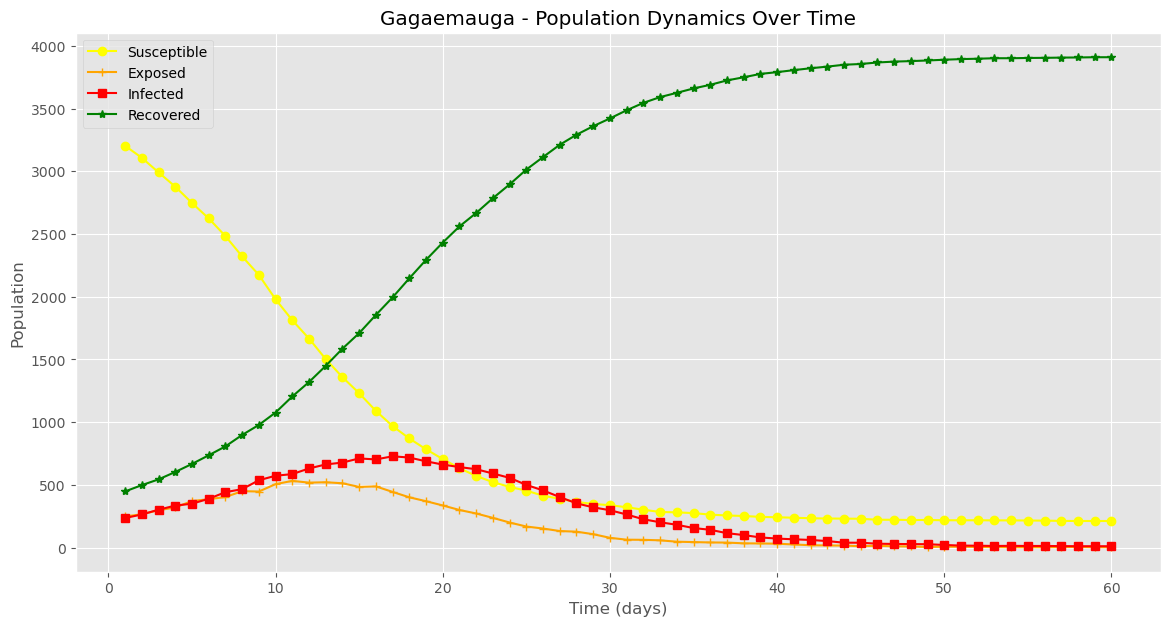

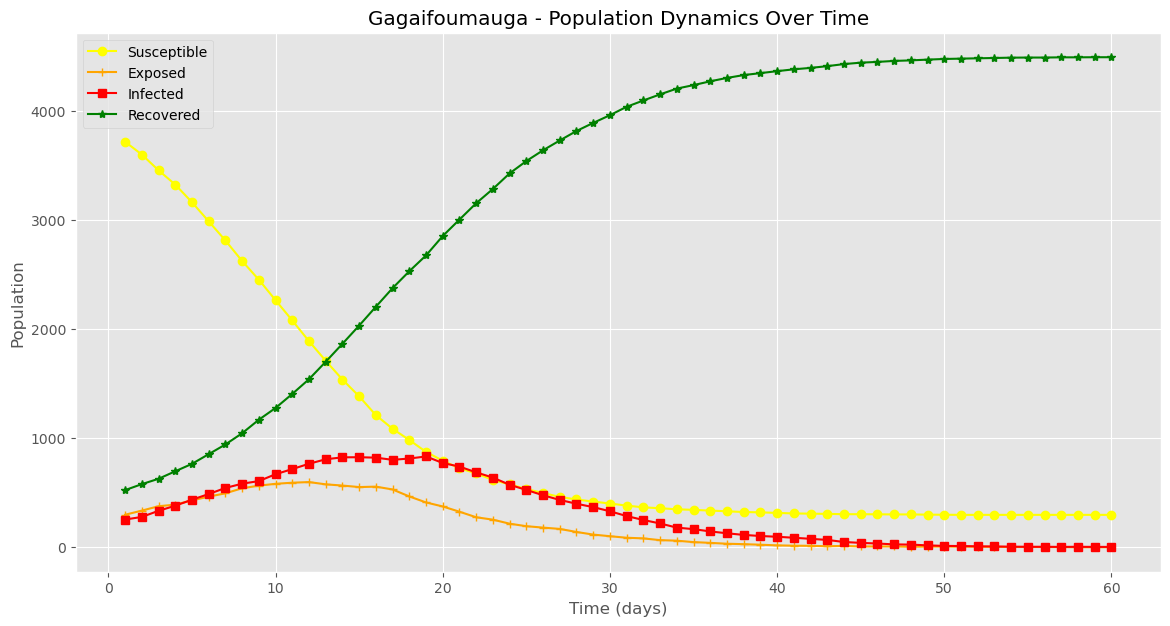

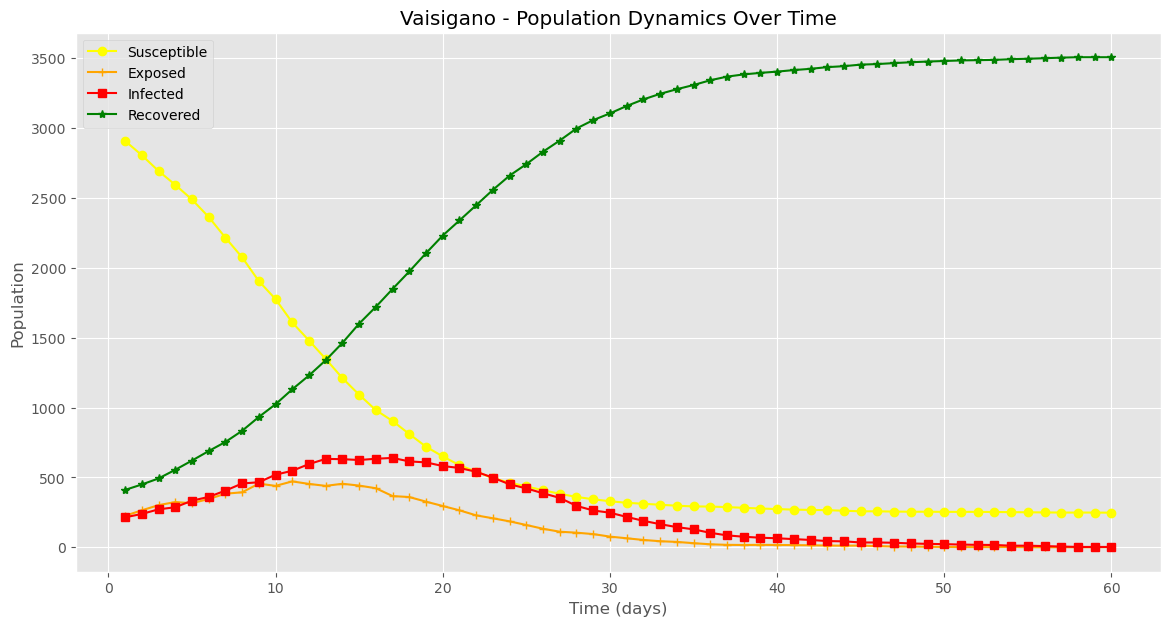

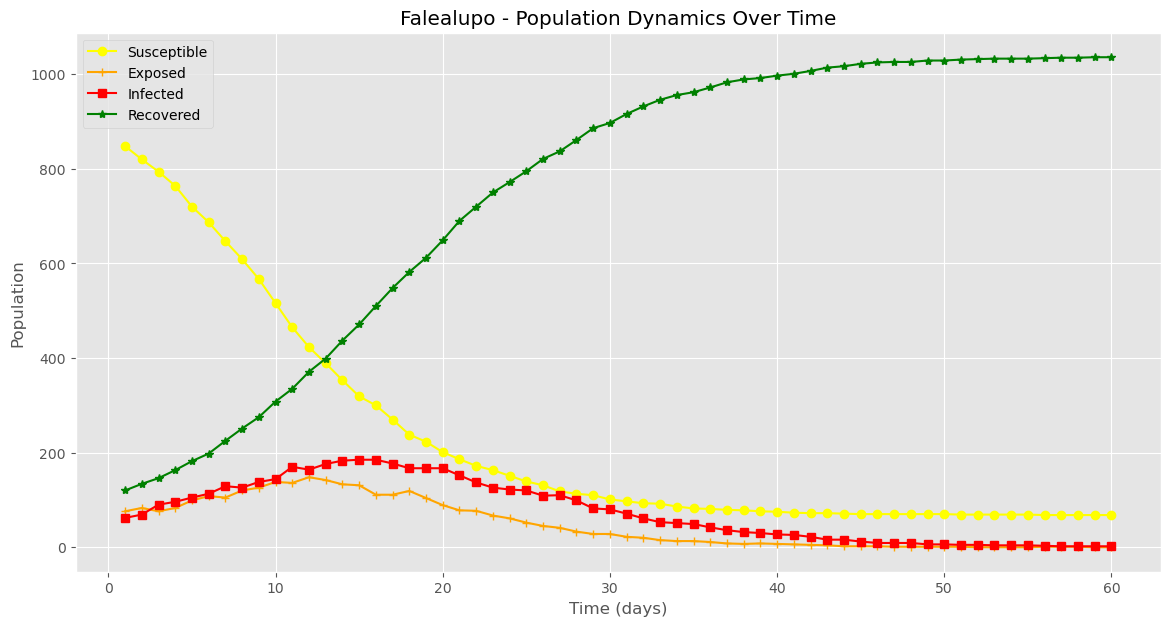

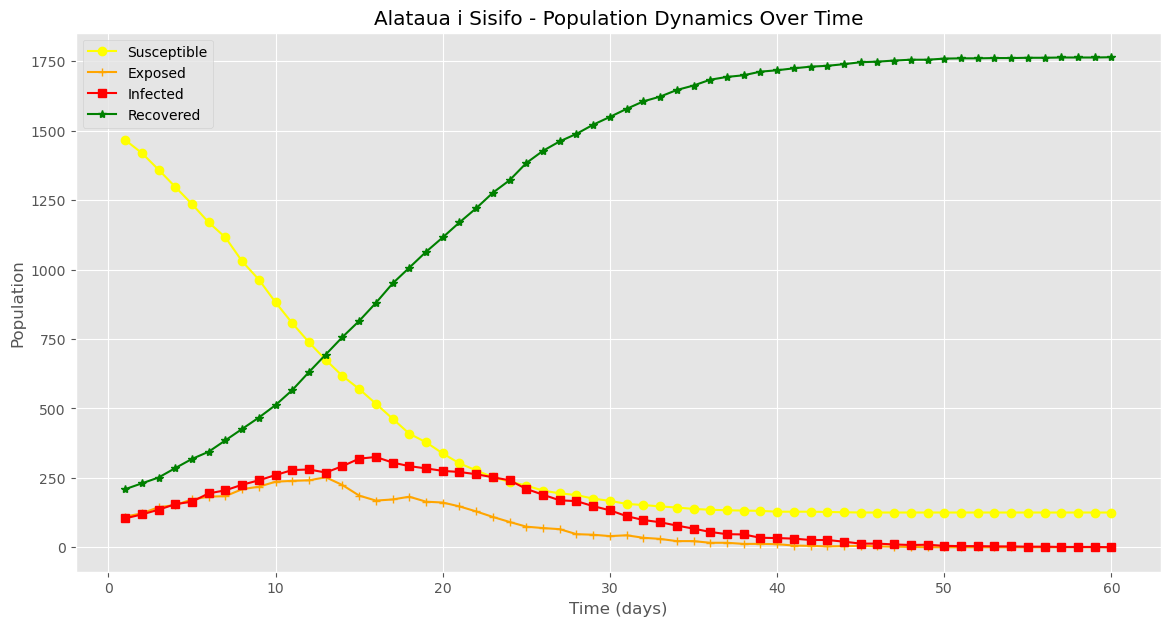

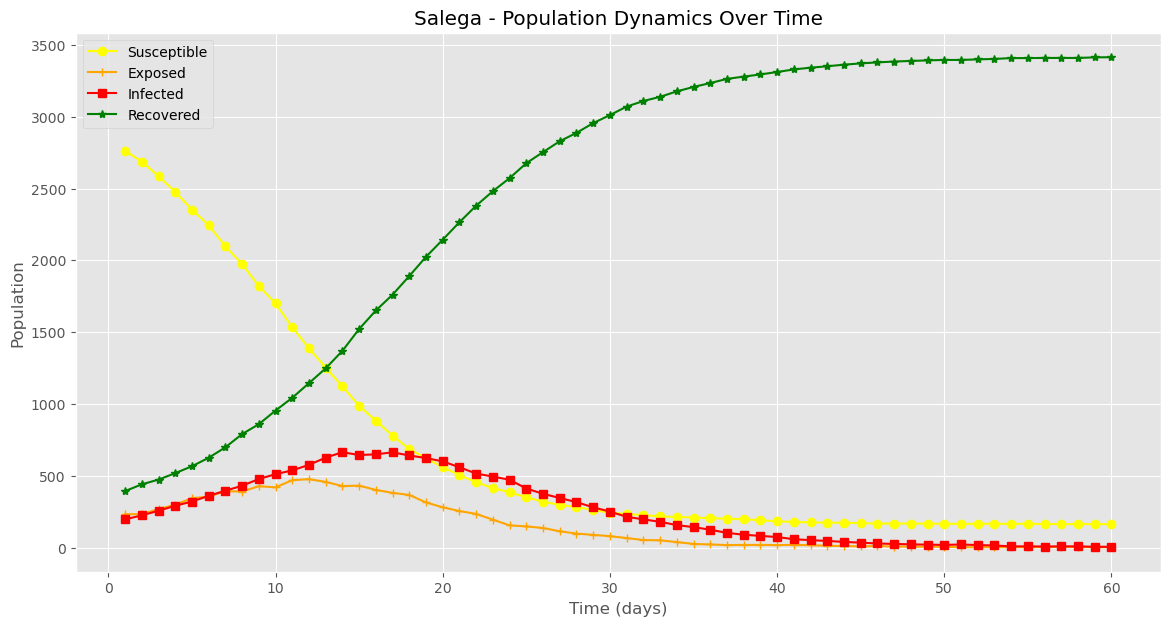

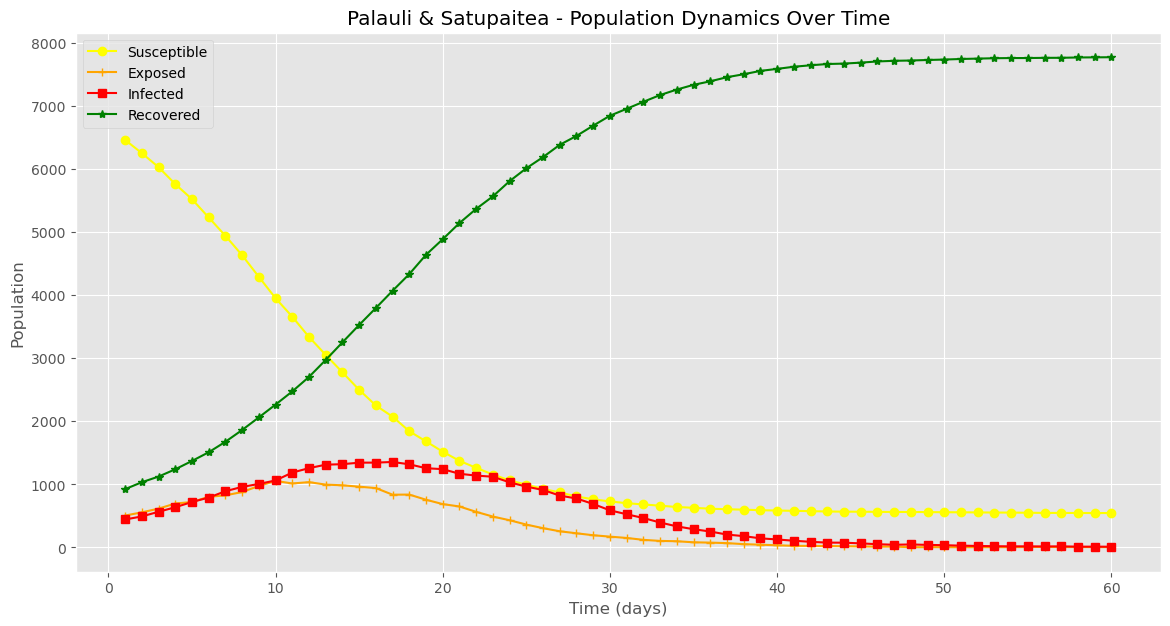

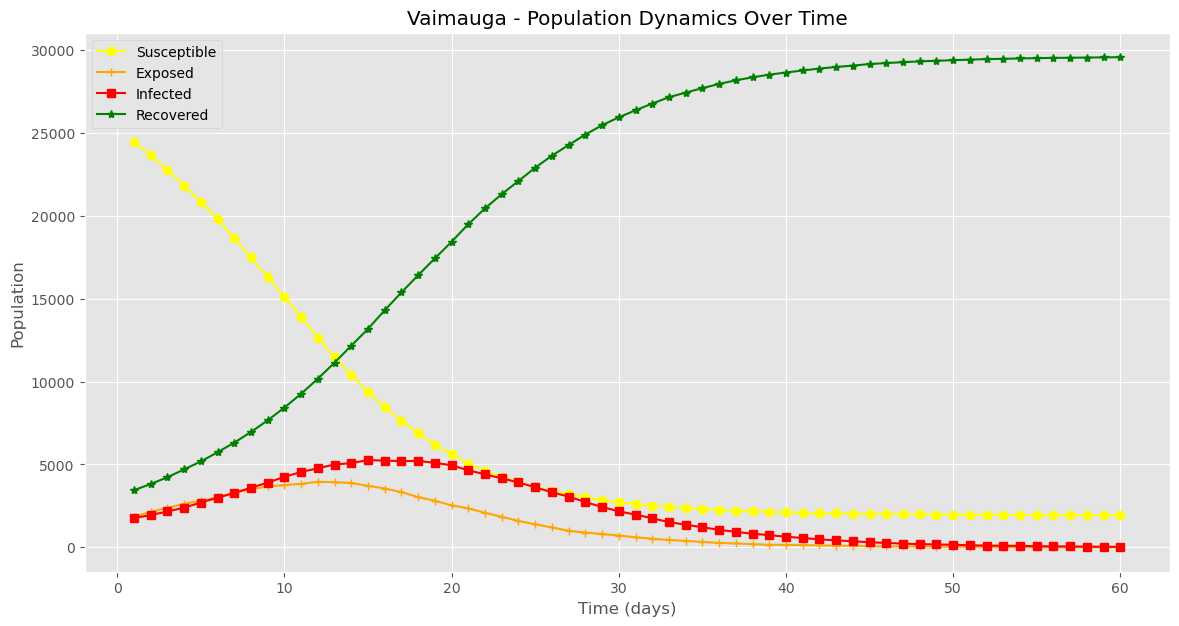

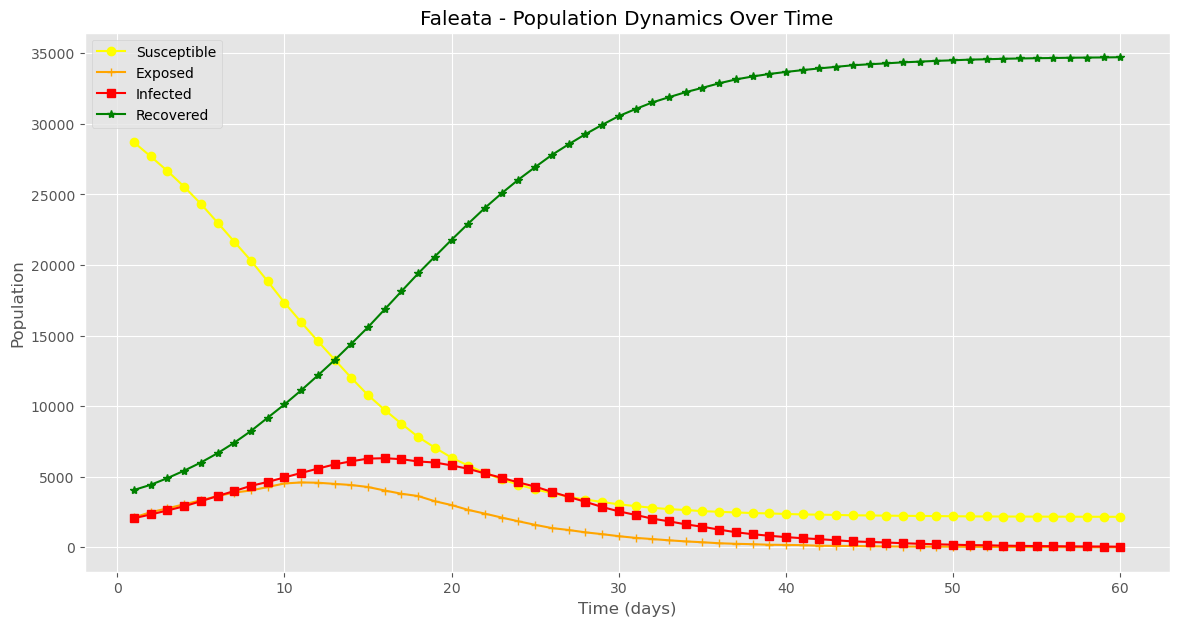

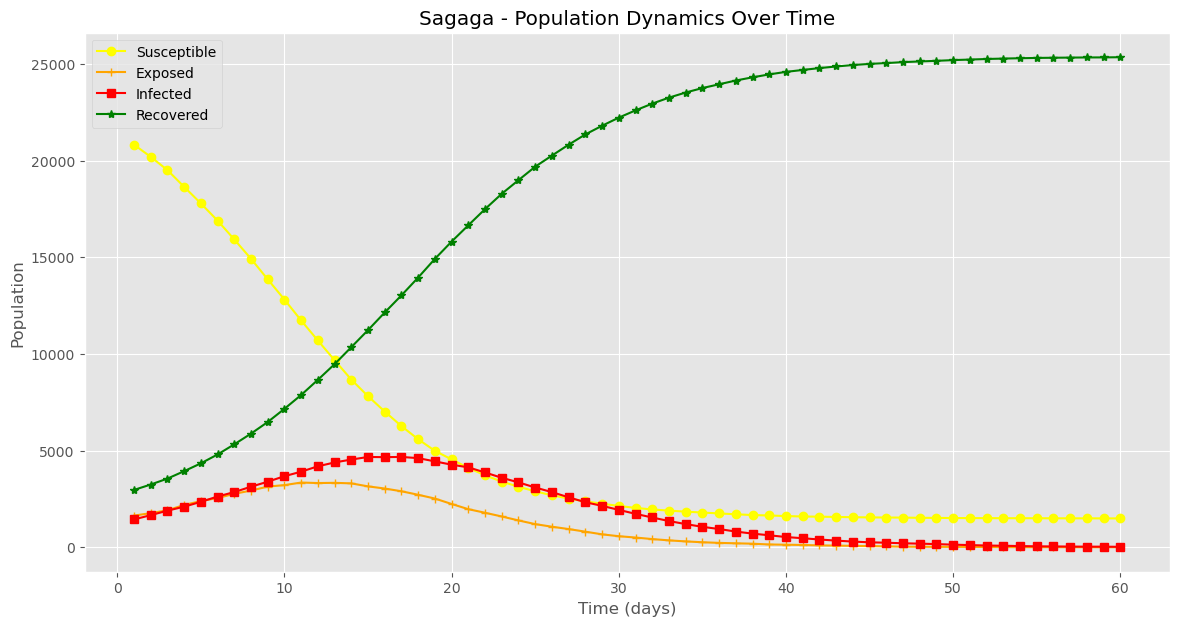

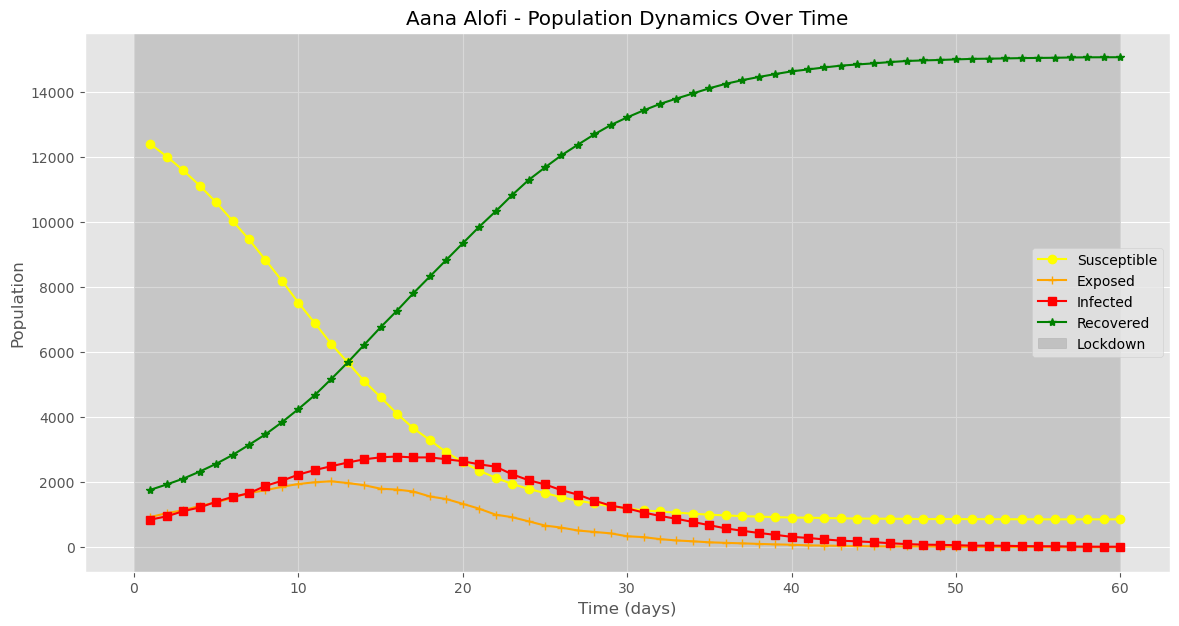

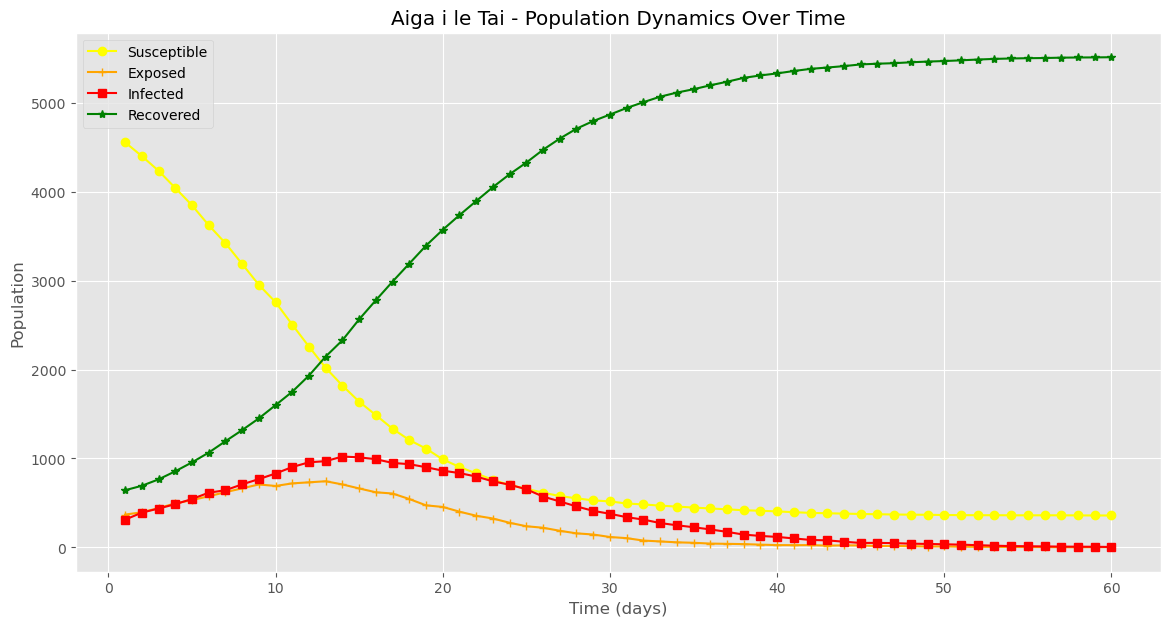

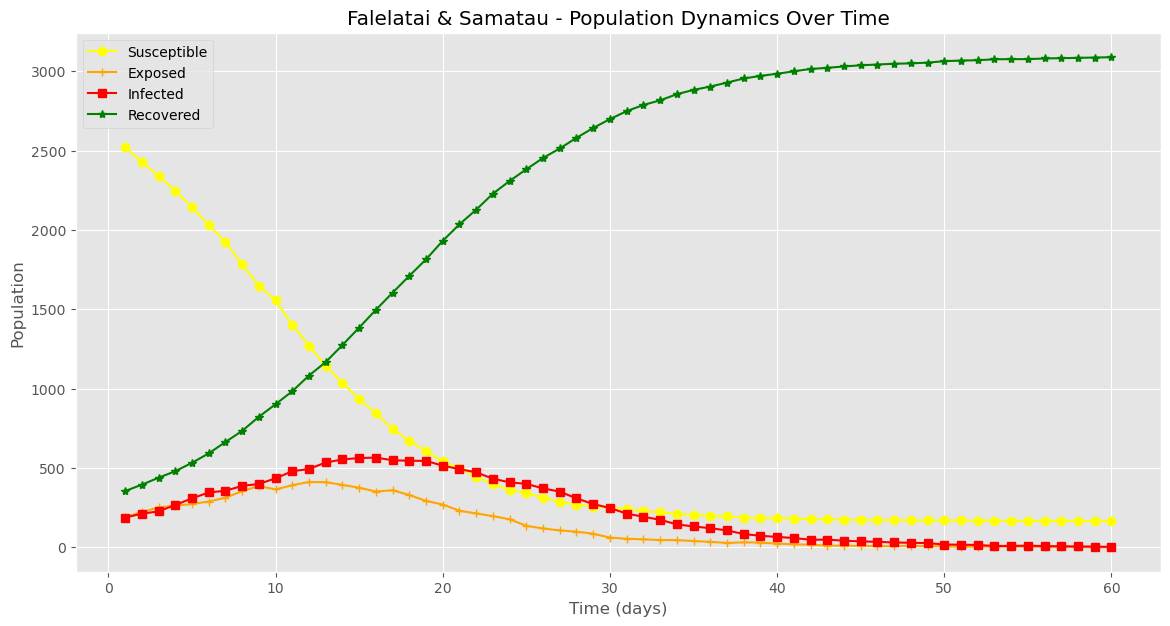

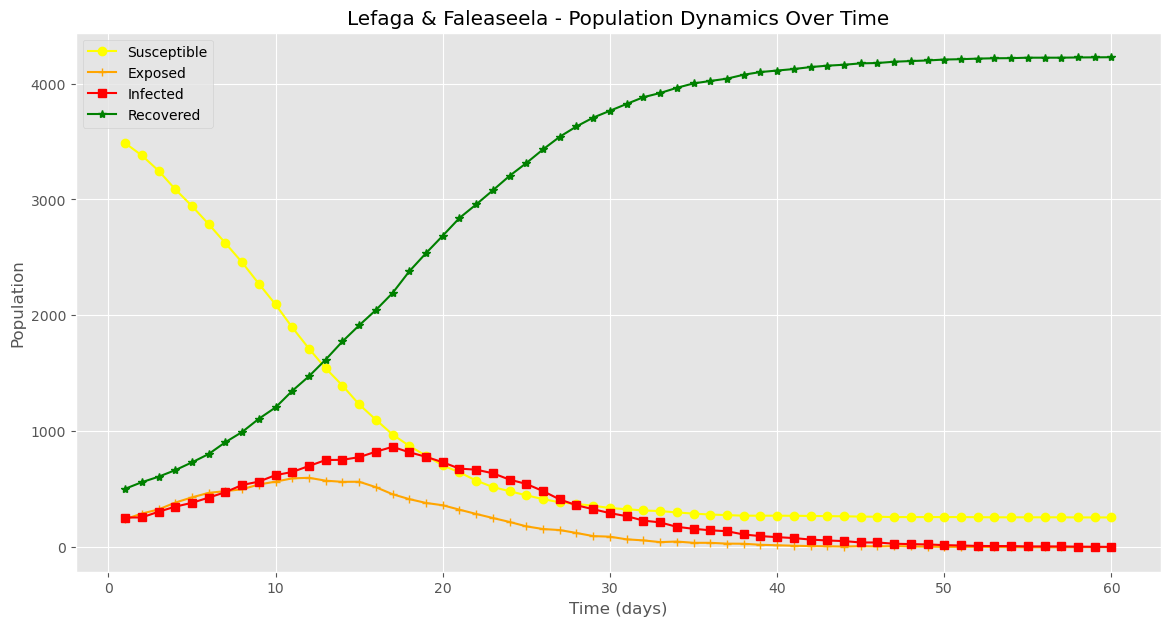

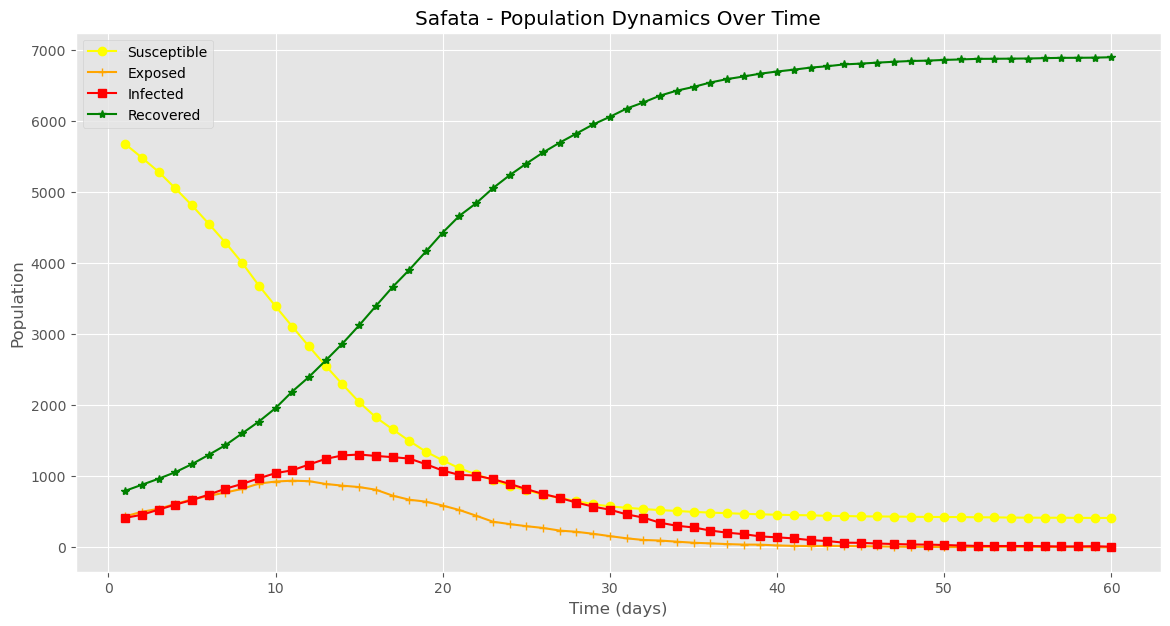

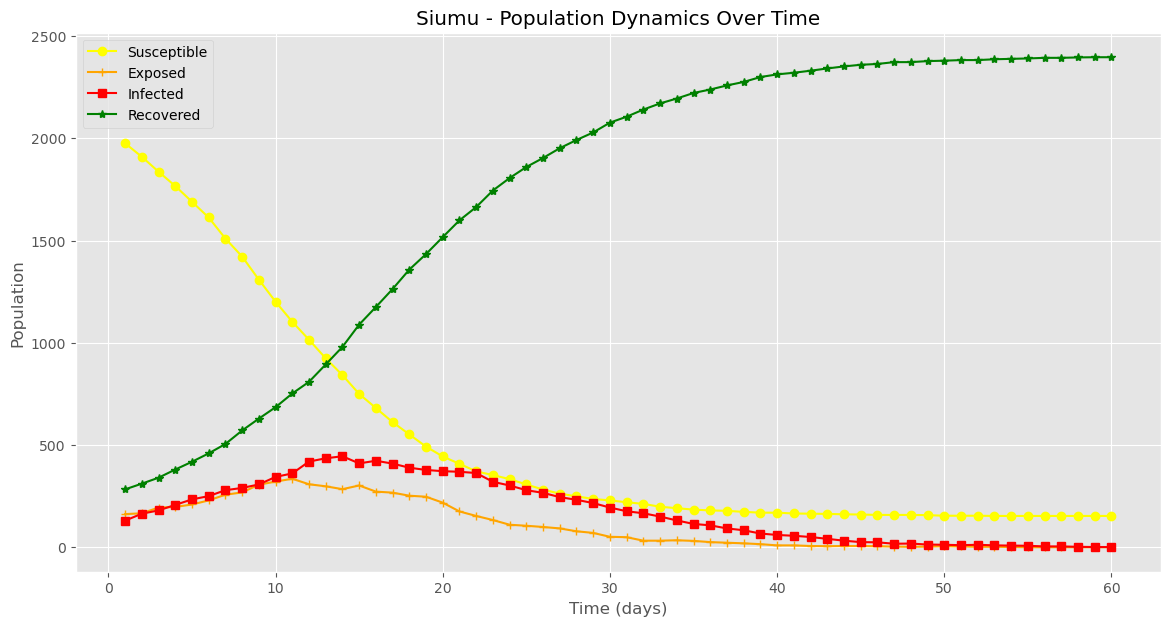

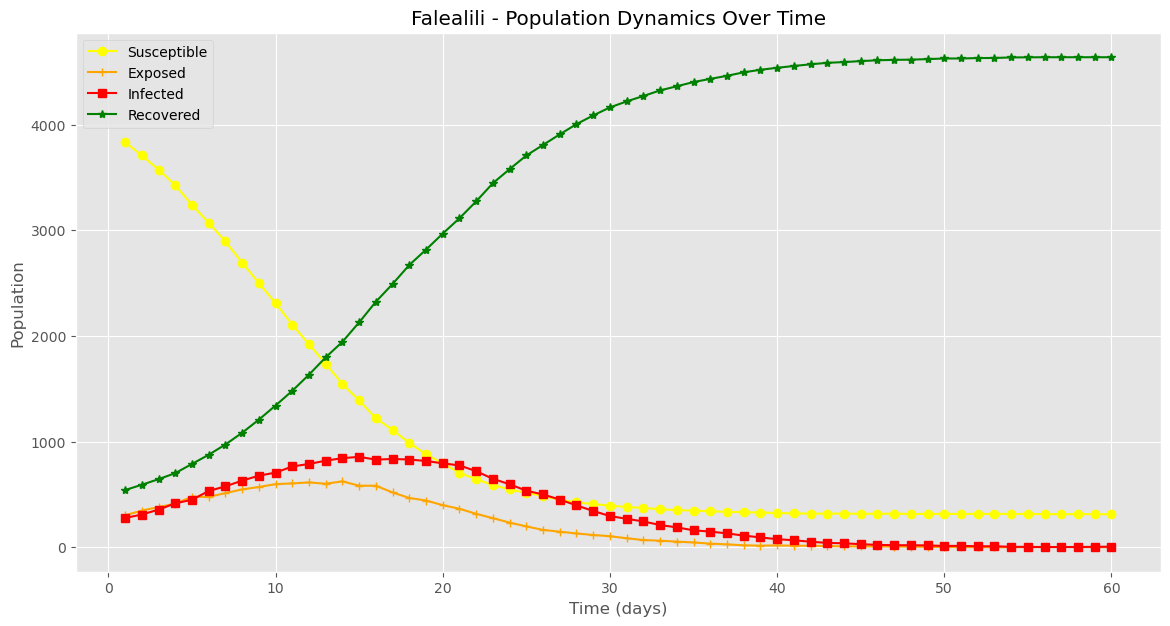

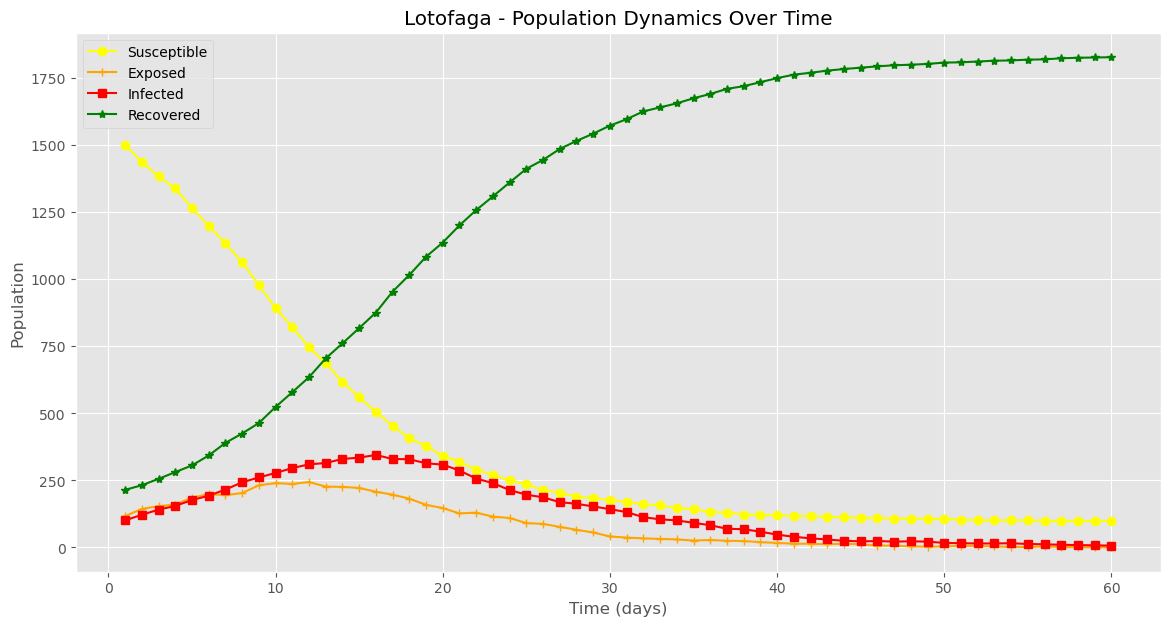

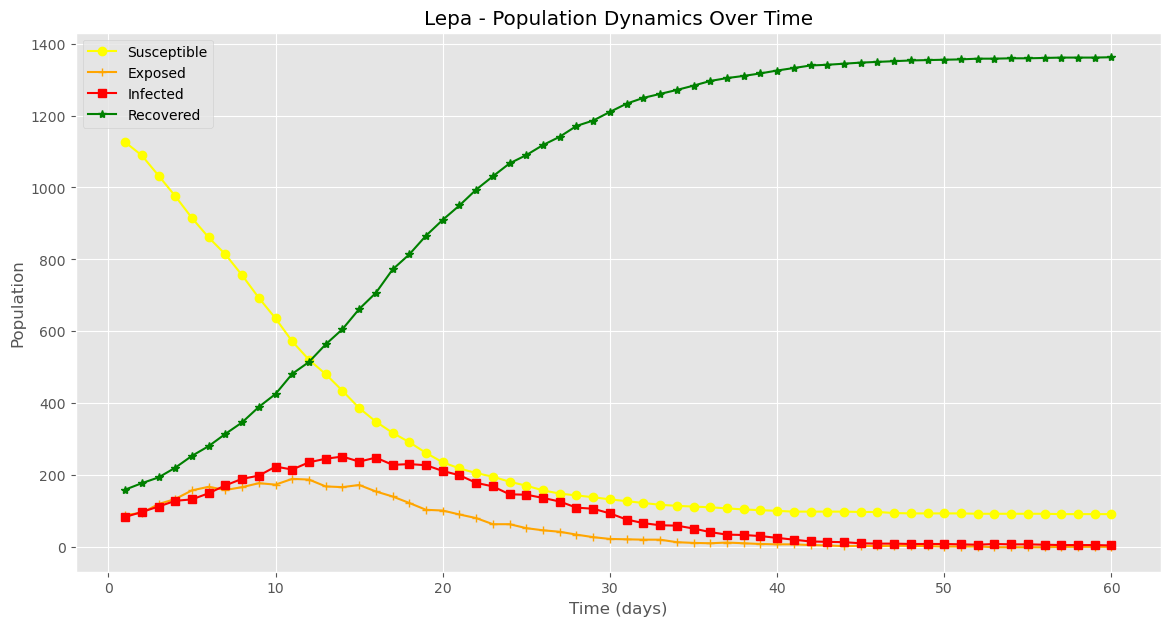

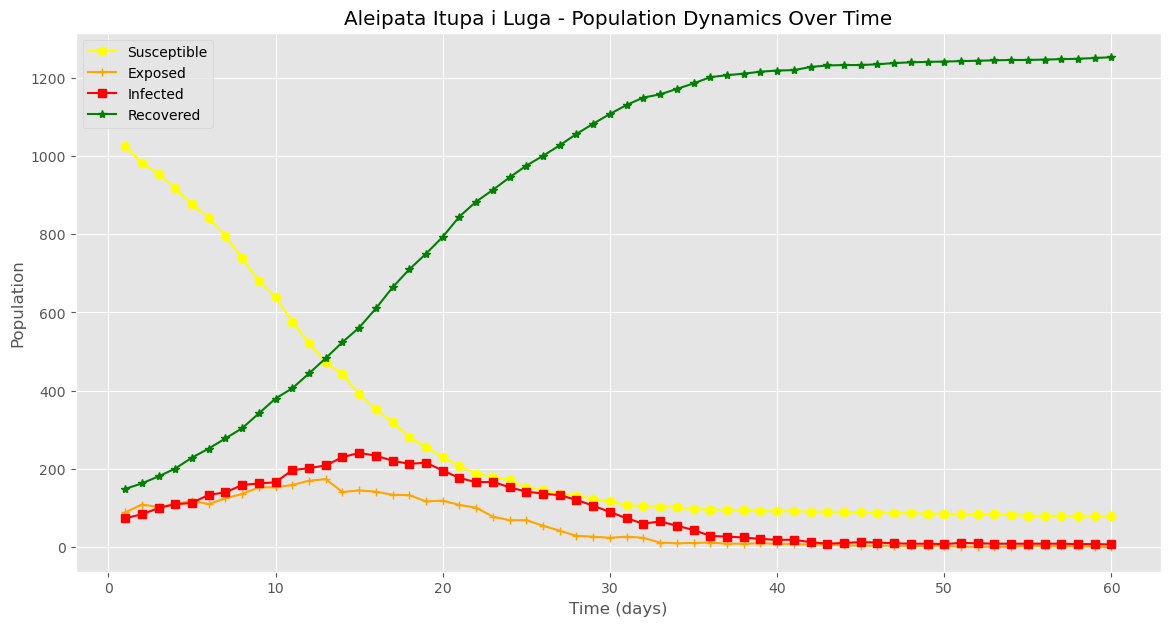

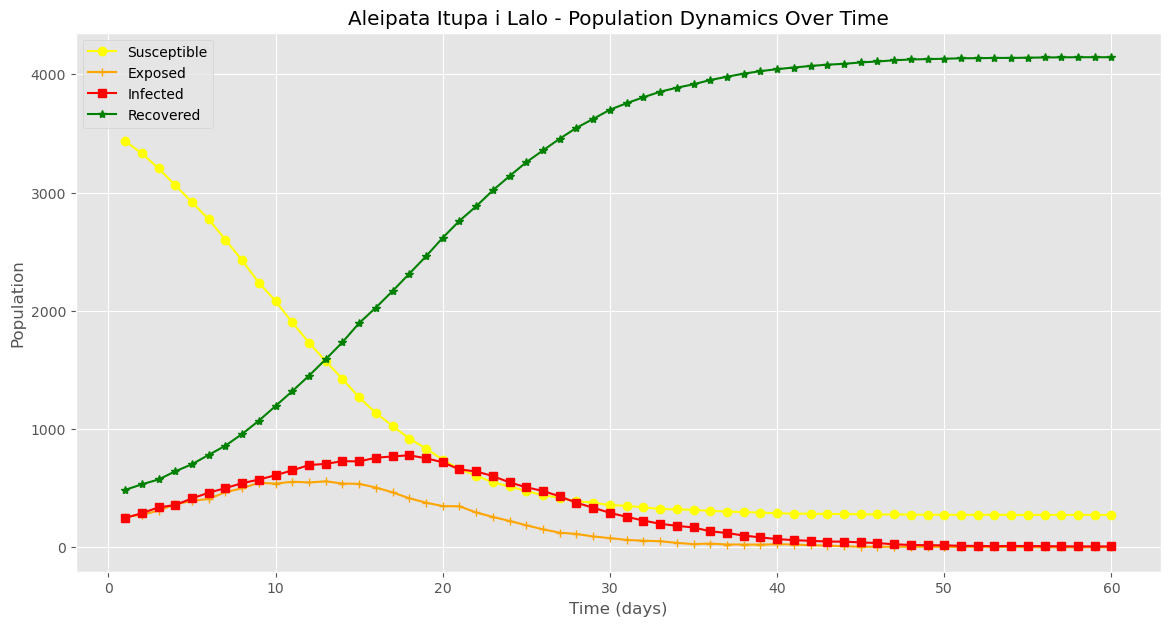

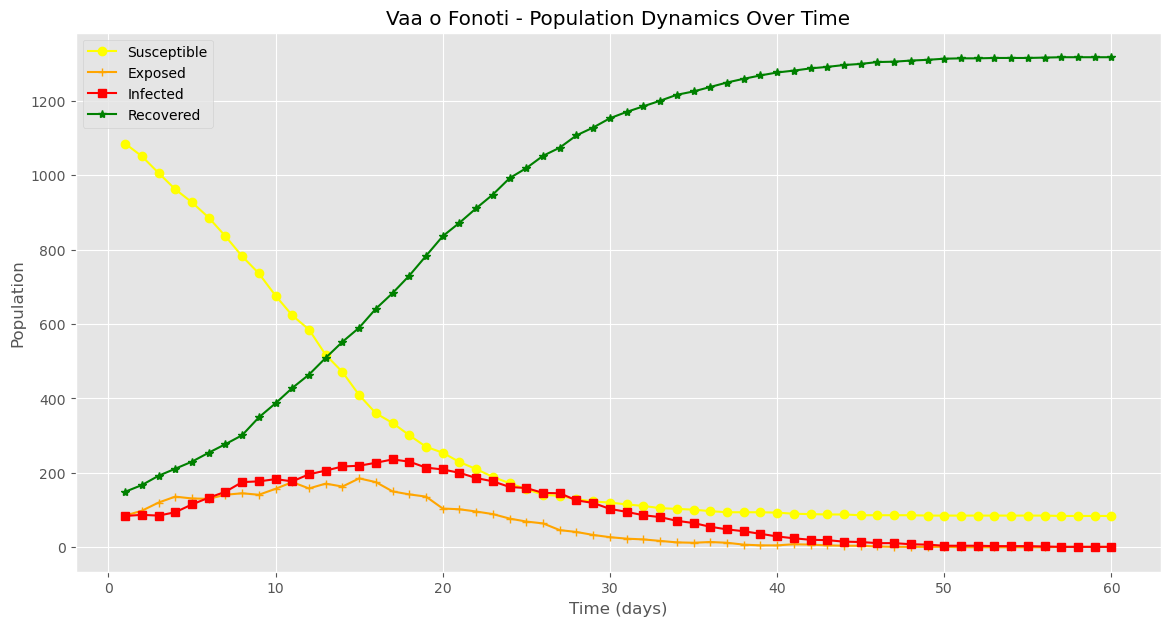

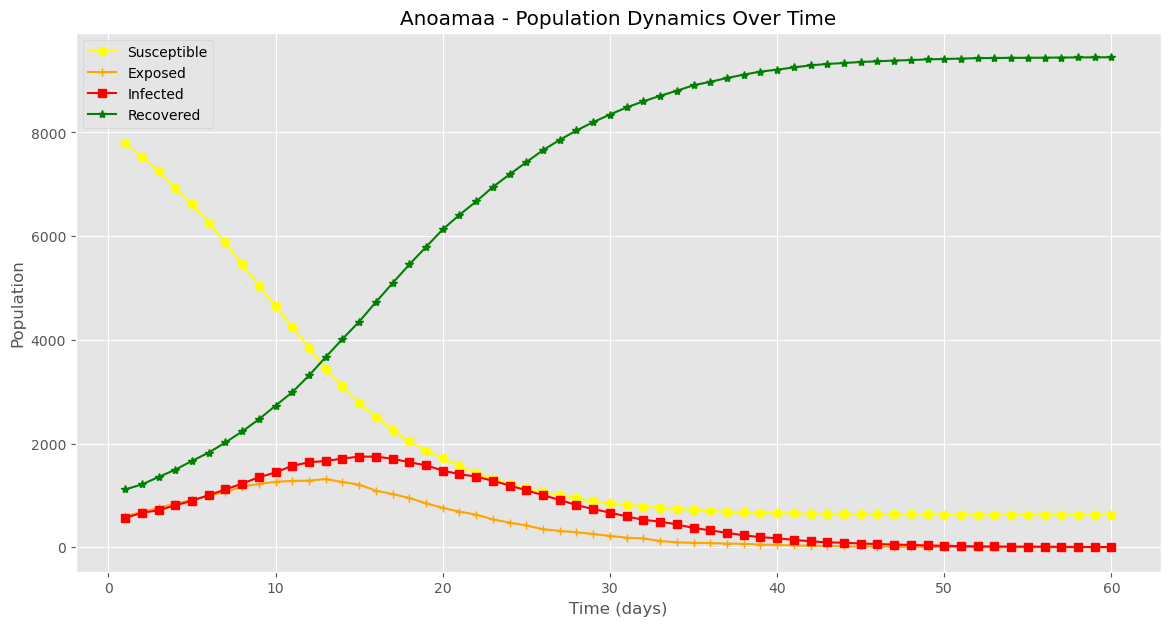

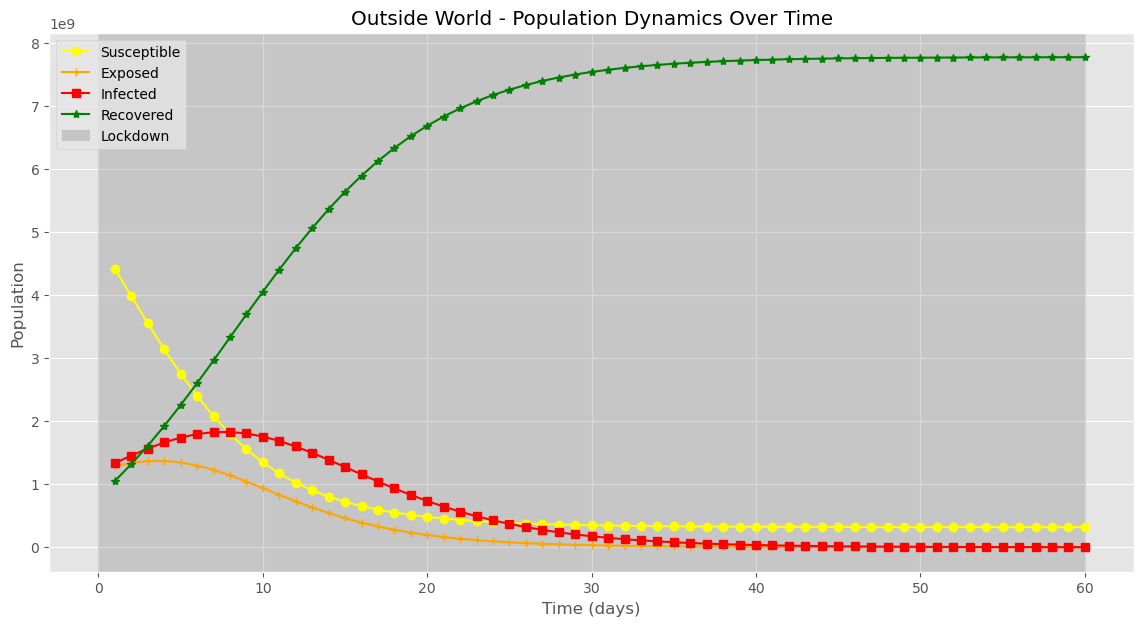

In [26]:
# Labels for population categories
compartment_labels = ['Susceptible', 'Exposed', 'Infected', 'Recovered']
compartment_colors = ['yellow', 'orange', 'red', 'green']
compartment_marker = ['o', '+', 's', '*']


# Obtain the communities affected by the lockdown
lockdown_ports_set = set(parameters['lockdown_ports'])
affected_communities = {port_to_community[port] for port in lockdown_ports_set if port in port_to_community}

# Itera on each community to create a graph
for i, community_name in enumerate(communities_ordered):
    # Crear la figura para cada comunidad
    plt.figure(figsize=(14, 7))

    # Extract the data of each compartment for the current community.
    for j, (label, color, marker) in enumerate(zip(compartment_labels, compartment_colors, compartment_marker)):
        compartment_history = [day_array[i, j] for day_array in history]         
        plt.plot(days, compartment_history, label=label, color=color, marker=marker)

    # Adjust the axes and add title and labels
    plt.title(f"{community_name} - Population Dynamics Over Time")
    plt.xlabel("Time (days)")
    plt.ylabel("Population")
    
    # Highlight the lockdown period for affected communities only.
    if community_name in affected_communities:
        plt.axvspan(lockdown_start, lockdown_end, color='grey', alpha=0.3, label='Lockdown')

    # Add legend
    plt.legend()

    # Display the graph
    plt.show()
